# Import module

In [1]:
# From the repository
from util import *
from read_data import *
data_names = list(name2file_name.keys())
print(data_names)

# Basic modules
import os
import glob
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from graph_tool.all import *
# import module
import ge


#name = "wiod2016"
name = data_names[3]
print("We are going to use: " + name)
# Enable original_format to use the format as originally provided
data_dict = get_data(name,original_format=False)
data_dict.keys()
#df_nodes = data_dict["df_nodes"]
df_edges = data_dict["df_edges"]

df_edges = df_edges[["source","target"]].drop_duplicates()
cond = df_edges["source"] != df_edges["target"]
df_edges = df_edges.loc[cond].copy()

['blogcatalog', 'homosapiens', 'wikipos', 'enron', 'unvote', 'untrade', 'uslegis_net', 'uslegis_net_small_dyn', 'uslegis_net_dyn', 'uslegis_hyp_dyn', 'contacts', 'dawn_net', 'dawn_hyp', 'ndc_net', 'ndc_hyp', 'coauth_dblp_net', 'coauth_dblp_hyp', 'wiod2016', 'wiod2013', 'wiodlong', 'eth', 'bitcoinalpha', 'bitcoinotc', 'uscourt']
We are going to use: enron


# Create network object

In [2]:
inputGraph = nx.from_pandas_edgelist(df_edges)

# Settings

In [3]:
embedDim = 2 # embedding size
numbOfWalksPerVertex = 2 # walks per vertex
walkLength = 4 # walk lenght
lr =0.025 # learning rate
windowSize = 3 # window size
model_type = "struct2vec"

# Define Random Walk

In [4]:
%%time
if model_type == "deepwalk":
    rw = ge.DeepWalk(inputGraph, walkLength=walkLength, embedDim=embedDim, numbOfWalksPerVertex=numbOfWalksPerVertex, \
              windowSize=windowSize, lr = lr)
elif model_type == "node2vec":
    # Node2Vec
    rw = ge.Node2vec(inputGraph, walkLength=walkLength, embedDim=embedDim, numbOfWalksPerVertex=numbOfWalksPerVertex, \
               windowSize=windowSize, lr=lr, p = 0.5, q = 0.8)
elif model_type == "struct2vec":
    rw = ge.Struc2Vec(inputGraph, walkLength=walkLength, embedDim=embedDim, numbOfWalksPerVertex=numbOfWalksPerVertex, \
              windowSize=windowSize, lr = lr)

CPU times: user 2min 14s, sys: 113 ms, total: 2min 14s
Wall time: 2min 14s


# Run Model

In [5]:
%%time
modelSkipGram = ge.SkipGramModel(rw.totalNodes, rw.embedDim)
model = rw.learnNodeEmbedding(modelSkipGram)

CPU times: user 35.8 s, sys: 110 ms, total: 35.9 s
Wall time: 9.22 s


# Visualize Result

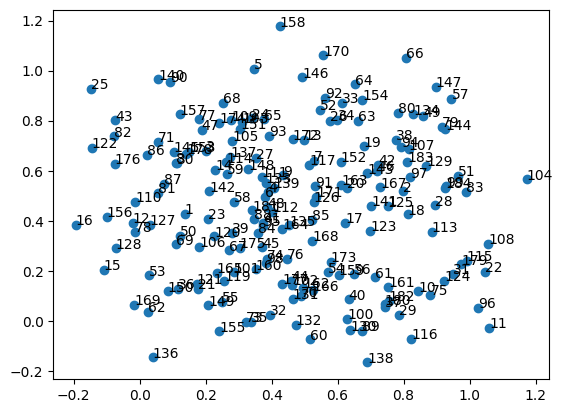

In [6]:
ge.plot_2DEmbedding(rw)

In [7]:
node1 = 35
node2 = 40

# Get Embedding for a node
emb = rw.getNodeEmbedding(node1)
print("Node Embedding", emb)

Node Embedding tensor([ 0.3385, -0.0026])
